# Predicting the Price of Diamond

<img src="https://jnn.net.tr/wp-content/uploads/2023/03/diamond.png" width="600">

In this project, the goal is to predict the price ($) of diamonds based on their physical attributes (`carat`, `cut`, `color`, `clarity`, etc.). The dataset is from a "Kaggle competition," and the task is a "**regression**" problem. The target variable is "**price**".

## Features

* `carat`: Weight of the diamond (numeric).
* `cut`: Quality of the cut (categorical: Fair, Good, Very Good, Premium, Ideal)
* `color`: Diamond color (categorical: from J to D)
* `clarity`: A measurement of how clear the diamond is (categorical: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
* `depth`: Total depth percentage (numeric).
* `table`: Width of top of diamond relative to widest point (numeric).
* `x`: Length (mm) (numeric).
* `y`: Width (mm) (numeric).
* `z`: Depth (mm) (numeric).
* `price`: (Target) Price of the diamond (USD) (numeric).

The dataset was taken from Kaggle.

[Kaggle | Predicting the price of diamond](https://www.kaggle.com/competitions/predicting-the-price-of-diamond/overview)

## Data Read

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')

## EDA - Exploratory Data Analysis¶

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.31,Ideal,H,VS2,61.8,57.0,4.39,4.36,2.68,681.0
1,1,0.38,Ideal,G,VVS1,60.8,56.0,4.67,4.73,2.89,1132.0
2,2,0.38,Very Good,G,SI1,61.0,56.0,4.68,4.64,2.81,1307.0
3,3,0.71,Premium,H,SI1,60.6,58.0,5.83,5.80,3.49,1308.0
4,4,0.31,Very Good,G,IF,62.0,57.0,4.32,4.36,2.70,645.0


In [4]:
df.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
19995,19995,1.13,Premium,G,SI2,60.6,56.0,6.77,6.82,4.08,5408.0
19996,19996,0.91,Premium,G,VS1,60.6,59.0,6.26,6.30,3.93,2961.0
19997,19997,1.12,Ideal,H,SI1,62.2,57.0,6.74,6.71,4.10,3610.0
19998,19998,1.01,Premium,D,VS2,60.8,59.0,6.47,6.53,3.97,1123.0
19999,19999,0.30,Very Good,F,SI1,61.8,57.0,4.28,4.31,2.66,765.0


In [5]:
df = df.drop('id', axis=1)

In [6]:
df.shape

(20000, 10)

In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,carat,depth,table,x,y,z,price
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.773143,61.81417,57.245750,5.692152,5.696200,3.519596,3953.504850
std,0.434161,1.05800,1.813067,1.145070,1.147782,0.659160,4016.660252
min,0.000000,55.70000,52.000000,0.240000,0.260000,2.110000,327.000000
25%,0.390000,61.30000,56.000000,4.680000,4.690000,2.890000,963.000000
50%,0.710000,61.90000,57.000000,5.720000,5.730000,3.540000,2403.000000
75%,1.020000,62.40000,58.000000,6.500000,6.500000,4.020000,5330.250000
max,6.010000,69.50000,68.000000,65.100000,67.500000,7.540000,18797.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: xlabel='price', ylabel='Count'>

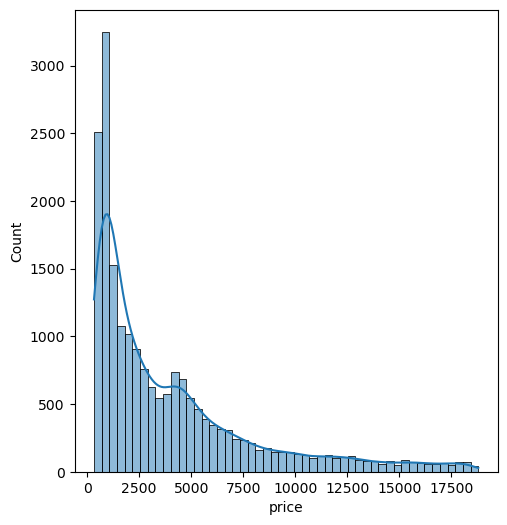

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50)

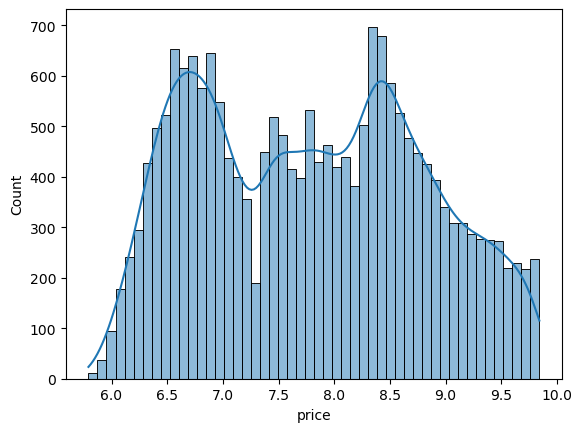

In [12]:
sns.histplot(np.log1p(df['price']), kde=True, bins=50);

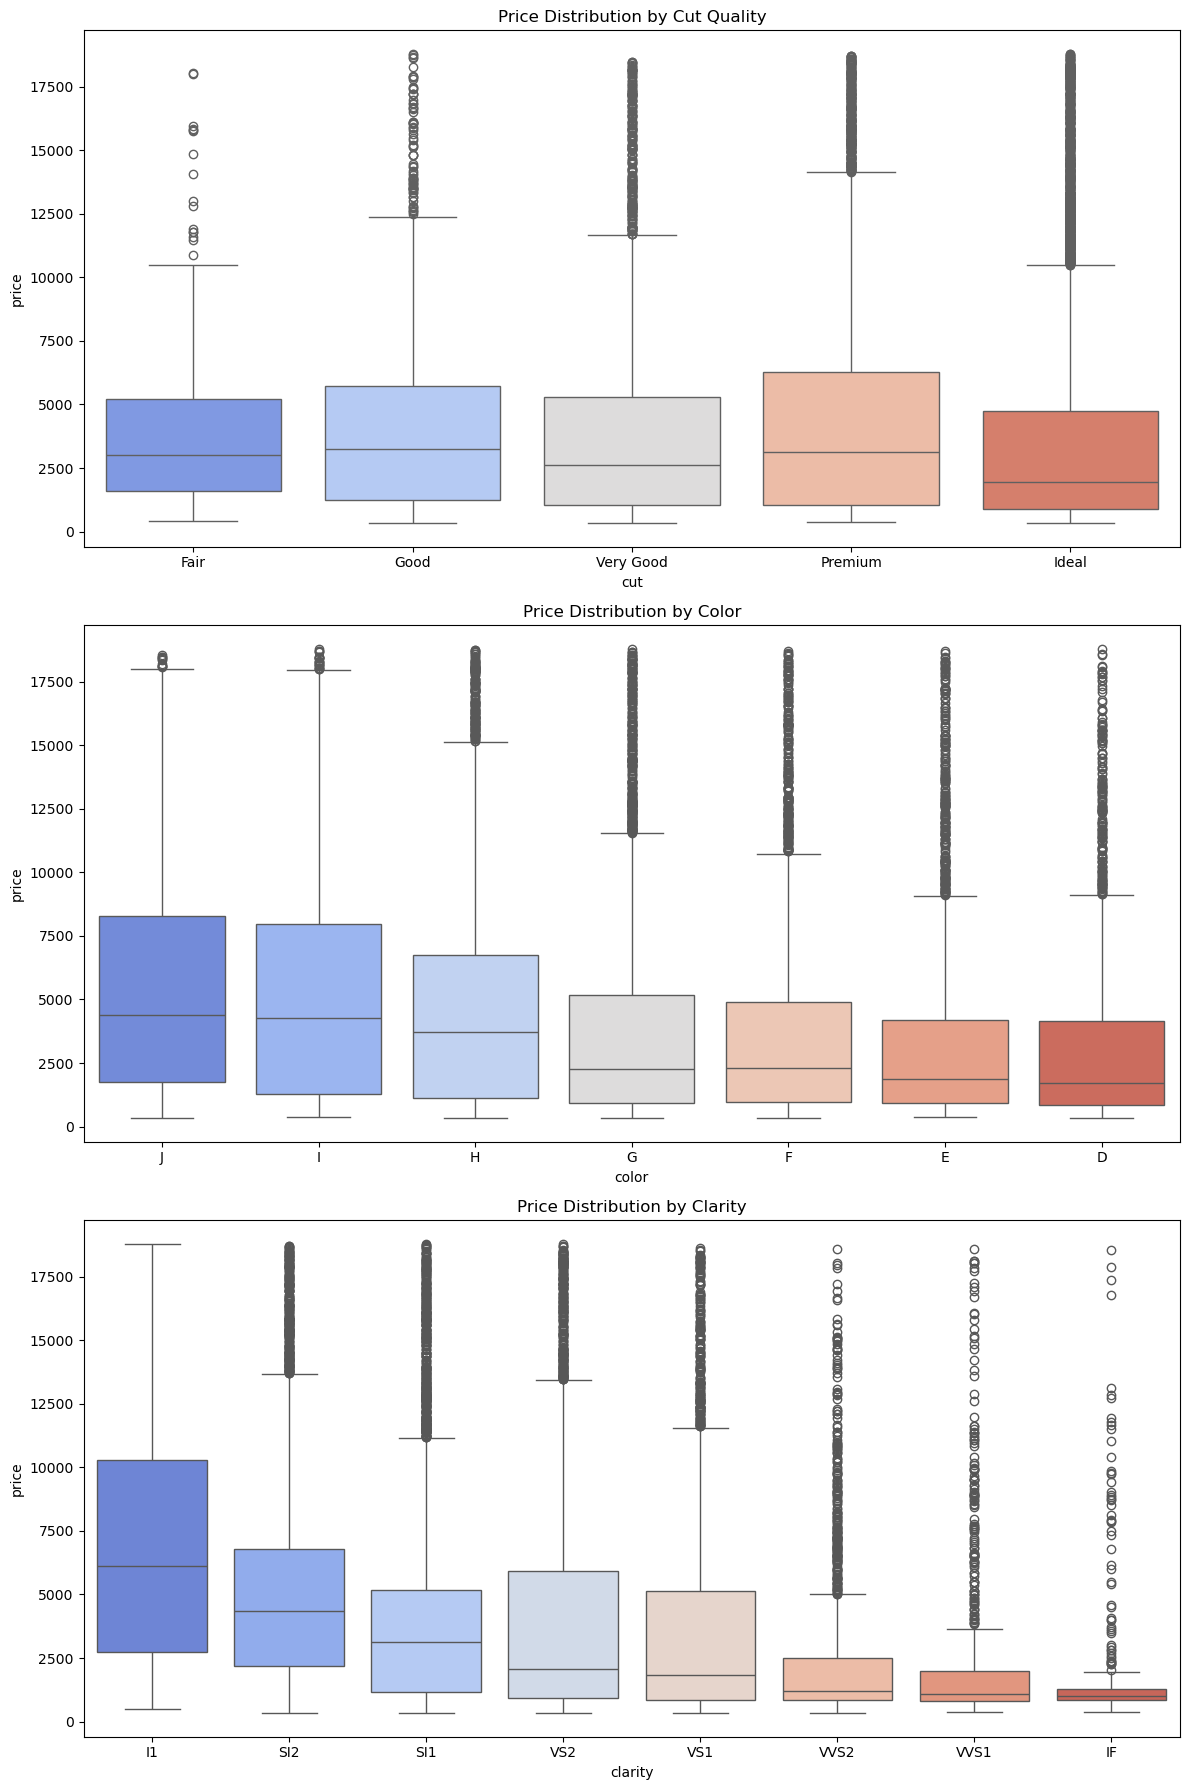

In [13]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12, 18))


sns.boxplot(data=df, x='cut', y='price', order=cut_order, ax=ax1, palette='coolwarm')
ax1.set_title('Price Distribution by Cut Quality')


sns.boxplot(data=df, x='color', y='price', order=color_order, ax=ax2, palette='coolwarm')
ax2.set_title('Price Distribution by Color')


sns.boxplot(data=df, x='clarity', y='price', order=clarity_order, ax=ax3, palette='coolwarm')
ax3.set_title('Price Distribution by Clarity')

plt.tight_layout()
plt.show()

<Axes: >

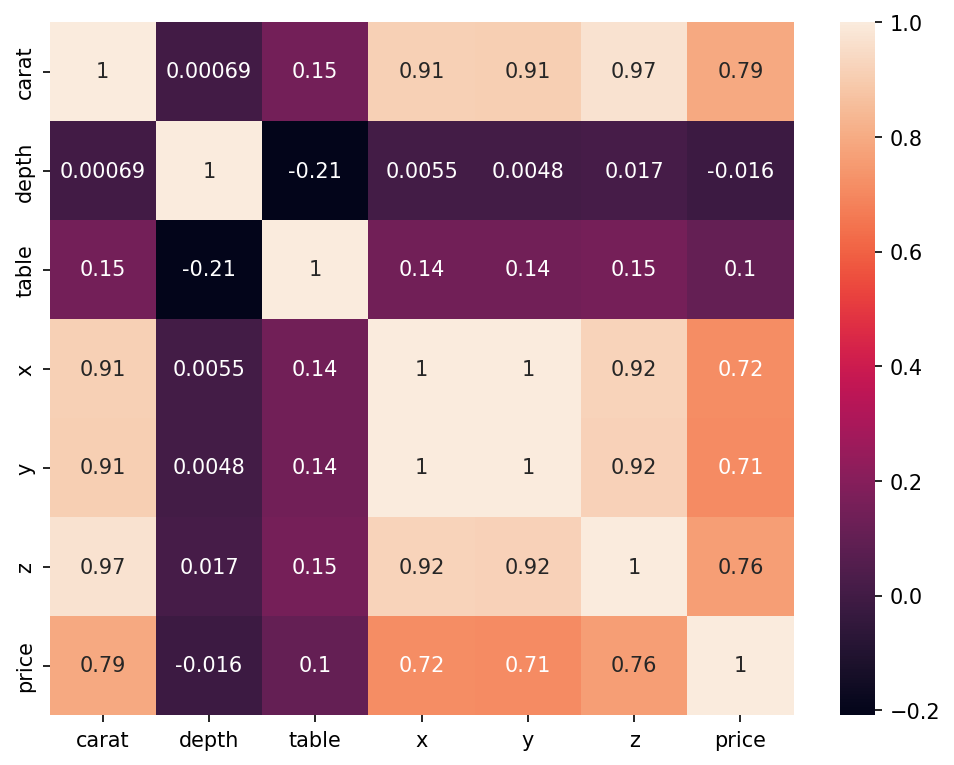

In [14]:
plt.figure(figsize=(8,6), dpi=150)
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [15]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price    1.000000
carat    0.792882
z        0.762594
x        0.716429
y        0.711988
table    0.103977
depth    0.015520
Name: price, dtype: float64

In [16]:
df['cut'].value_counts()

cut
Ideal        9408
Premium      5554
Very Good    3790
Good         1081
Fair          166
D               1
Name: count, dtype: int64

In [17]:
df = df[df['cut'] != 'D']

## Modelling

In [18]:
x = df.drop(columns=['price', 'depth'])
y = df['price']

In [19]:
x = pd.get_dummies(x)

In [22]:
x.head()

,carat,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.31,57.0,4.39,4.36,2.68,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,0.38,56.0,4.67,4.73,2.89,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,0.38,56.0,4.68,4.64,2.81,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,0.71,58.0,5.83,5.80,3.49,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
4,0.31,57.0,4.32,4.36,2.70,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def algo_test(x,y):

        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor']
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            print(algo, " modeli eğitiliyor!..")
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [21]:
algo_test(x,y)

LinearRegression()  modeli eğitiliyor!..
Ridge()  modeli eğitiliyor!..
Lasso()  modeli eğitiliyor!..
ElasticNet()  modeli eğitiliyor!..
SGDRegressor()  modeli eğitiliyor!..
ExtraTreeRegressor()  modeli eğitiliyor!..
GradientBoostingRegressor()  modeli eğitiliyor!..
AdaBoostRegressor()  modeli eğitiliyor!..
KNeighborsRegressor()  modeli eğitiliyor!..
DecisionTreeRegressor()  modeli eğitiliyor!..
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, 

,R_Squared,RMSE,MAE
Gradient Boosting,0.662669,2399.332546,1381.102321
Lasso,0.635098,2495.459572,1508.617415
Linear,0.634970,2495.895950,1497.548694
Ridge,0.634909,2496.106018,1524.057468
XGBRegressor,0.629671,2513.947700,1443.612820
KNeighborsRegressor,0.625908,2526.686516,1737.324545
SGD,0.620243,2545.746801,1634.710259
AdaBoost,0.564445,2726.363628,1654.535250
Extra Tree,0.279960,3505.426409,2071.448375
Decision Tree,0.260563,3552.327483,2102.378625


## Conclusion

In this project, a regression analysis was performed to predict the price of diamonds based on their physical attributes.

In the data preparation phase, categorical features such as `cut`, `color`, and `clarity` were converted to a numerical format using `pd.get_dummies` (one-hot encoding). Based on correlation analysis, the `depth` column, which had almost no relationship with 'price' (0.015), was removed from the feature matrix. Additionally, an anomalous data point ('D') in the `cut` column was cleaned.

Among the various regression algorithms tested, the **`Gradient Boosting`** model showed the best performance with an **$R^2$ (R-Squared) score of approximately 0.663**. This result indicates that the created model can successfully explain about 66.3% of the variance in diamond prices.